## Introduction

Before understanding the concepts of **distribution in statistics** we first should have a clear understanding about basic mathematical concepts like **Mean, Median and Mode**. They are considered to be known as "**location parameters"** as they used to spot us the **central value** of any distribition whether it is descrete or continous distribution. They are actually the breakdown terms of **central tendency of data** and pointed out as the **three measures** which return us the value that tell us about where the data has tendency to move further.


In this article, as discussed above, we will mainly working on those three measures of **central tendency** concept and try to implement the same using **Python**. Just keep a note, Python will make our implementation as easy as you like so that primarily our intention will be to understand the mathematics behind but not to learn the formulaes as **scipy** package will do that for us.


Enough of the introduction let's get started now!

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

plt.rcParams["figure.figsize"] = (10,6)

In the above code, we have imported three main package that will help us throughout the article. **Numpy** will be used to do mainly **mathematical operations** without any hassle. **Matplotlib** will plot all the inferences in the form of **histograms**. And last but not the least **scipy** for implementing all the central tendencies formulae via functions/methods.

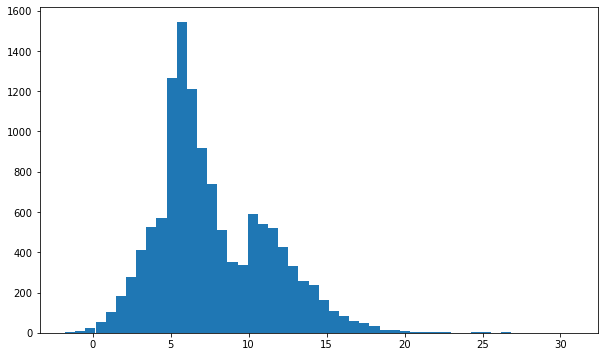

In [18]:
data = np.loadtxt("dataset.txt")
plt.hist(data, bins=50);

Okay, so the first thing we can do is try and get some metrics for the center of the distribution. Much of this section may not be ground-breaking for those who reading, so let's power through it.

## Mean

Mean is always considered as the **middle value** in the distribution. If we have a set of points N points denoted $x_i$, the mean is defined as

$$ \frac{1}{N} \sum_{i=1}^N x_i $$

A way to manually compute the mean is given by:

In [19]:
def get_mean(xs):
    summed = 0
    for x in xs:
        summed += x
    return summed / len(xs)
print(get_mean([3, 5, 2, 6]))

4.0


**But in this modern age we shouldn't have to write the function ourself. We can use **np.mean**. If we want datapoints to have different weights, we can use **np.average** instead. (For example, dice rolling might only record the value and number of times, not each individual roll).

In [20]:
mean = np.mean(data)
print(mean, data.mean(), np.average(data))

7.68805056 7.68805056 7.68805056


## Median

The most straightforward and clear definition of median will be, **sort all your data and take out the middle element**. That's your median. **[1,3,5,7,7]** has a median of **5**. Here's how we can manually find the median:

In [21]:
def get_median(xs):
    mid = len(xs) // 2
    if len(xs) % 2 == 1:
        return sorted(xs)[mid]
    else:
        return 0.5 * np.sum(sorted(xs)[mid - 1:mid + 1])
print(get_median([7, 7, 3, 1, 4, 5]))

4.5


**Inference:** Note in the case where there isn't a single middle element, we average the two in the middle.

**Note:** Don't use this function though, use **np.median**

In [22]:
median = np.median(data)
print(median)

6.7325


**Trivia**: Also, it is good to point out that median can often be **more** useful than the mean, because it is **less sensitive to outliers** and bad data. Consider this:

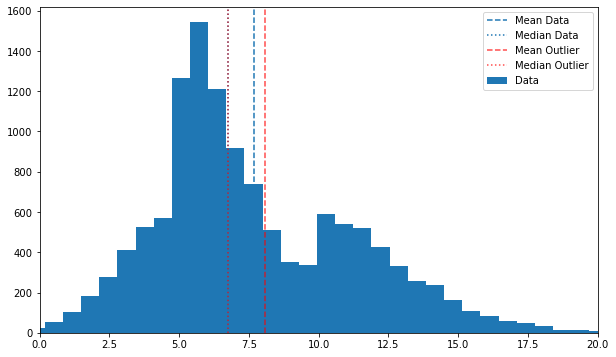

In [23]:
outlier = np.insert(data, 0, 5000)
plt.hist(data, label="Data", bins=50);
plt.axvline(np.mean(data), ls="--", label="Mean Data")
plt.axvline(np.median(data), ls=":", label="Median Data")
plt.axvline(np.mean(outlier), c='r', ls="--", label="Mean Outlier", alpha=0.7)
plt.axvline(np.median(outlier), c='r', ls=":", label="Median Outlier", alpha=0.7)
plt.legend()
plt.xlim(0,20);

**Infernce:**  Here is the short demonstration to explain how **mean is highly sensitive to outliers** while on the other hand median is not that sensitive to same. In the above set of codes we have inserted one outlier in pur data and plotted the distribution along with the mean and median (post adding outlier) and as a result we can see that **mean is shifted** while **median remains unchaged**.

## Mode

Another **outlier insensitive method**, it returns to us the value which is most common. **This works for discrete distributions only (sort of)**. If you have a continuous distribution, you will need to bin the data first. For example, the mode of **[1,7,2,5,3,3,8,3,2]** is **3**, because three shows up more than any other number. Here is a manual mode function:

In [24]:
def get_mode(xs):
    values, counts = np.unique(xs, return_counts=True)
    max_count_index = np.argmax(counts)
    return values[max_count_index]
print(get_mode([1,7,2,5,3,3,8,3,2]))

3


Yes, I know I'm sort of cheating by using **numpy** to simplify, but who wants me to write out all the code to manually count things up. If you want to give it a shot yourself, I'd recommend using a dictionary to store **{value: count}** pairs.

In [25]:
mode = st.mode(data)
print(mode)

ModeResult(mode=array([5.519]), count=array([9]))


**Inference:** You can see its not very useful. We got lucky by have two values hence, not a very good mode. We should **bin the data (make a histogram of it)** and retun the bin which has the most values in it. But then we have to pick the **number of bins, bin edges, etc,** and we sort of lose the point. 

In [26]:
hist, edges = np.histogram(data, bins=100)
edge_centers = 0.5 * (edges[1:] + edges[:-1]) # extracting edges of each bin
mode = edge_centers[hist.argmax()] 
print(mode)

5.223165


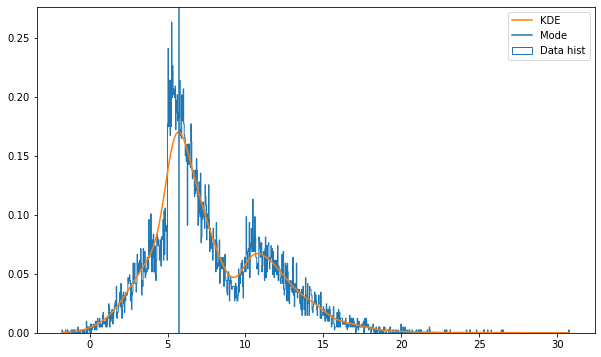

In [27]:
kde = st.gaussian_kde(data)
xvals = np.linspace(data.min(), data.max(), 1000)
yvals = kde(xvals)
mode = xvals[yvals.argmax()]
plt.hist(data, bins=1000, density=True, label="Data hist", histtype="step")
plt.plot(xvals, yvals, label="KDE")
plt.axvline(mode, label="Mode")
plt.legend();

**Inference:** For getting the nearly accurate mode for continous data, we have to smoothen the data a bit and for this step we have used famous **KDE (Kernel Density Estimation)**. And with the output as well we can see that even when the bins are changed to higher range the histogram is showing different values but the **KDE (yellow path) is not much effected and still showing the accurate mode**

# Comparison

Here is a comparison between mode, median and mean for the dataset:

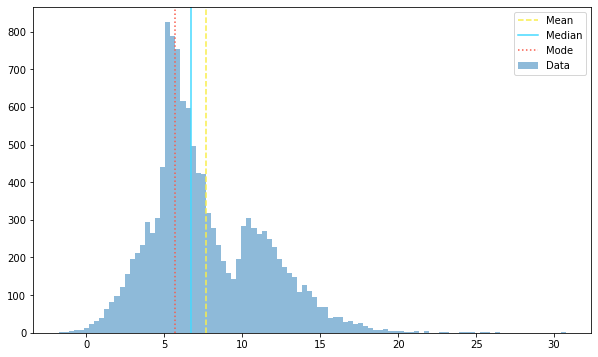

In [28]:
plt.axvline(mean, label="Mean", ls="--", c='#f9ee4a')
plt.axvline(median, label="Median", ls="-", c='#44d9ff')
plt.axvline(mode, label="Mode", ls=":", c='#f95b4a')
plt.legend();

**Inference:** Above graph is the kind of summary of what we have achieved so far, Where in the legend we can see that the graph has **Mean (yellow dotted line), Median (Blue solid line) as well as Mode (Red dotted line)**.

## Conclusion

Here we are in the last part of the article, where we will mould everything we learned so far in the nutshell. This article was all about to understand the basic maths behind the **central tendency measures** which helped us to know how to measure the **widths of the distribution**. Let's breakdown our learning in some points:

1. Firstly we started with the introduction about the topic and looking at the **distribution of data**, Then we move to the main topic where **Mean** as a term was introduced just after that implemented the same via Python.


2. Then, After mean we were supposed to discussed the **Median** and similar to Mean we practically saw the median as well. The trivia in this section was to understand the **Mean is highly outlier sensitive comparing to Median**.


3. At the last we learned about **Mode** (the third and final central tendency measure) and later compared all the three measures which helped us to differentiate all the three measures (both from nature and value) via single graph.